In [1]:
get_ipython().run_line_magic('matplotlib', 'widget')

In [2]:
pip install jsonpickle

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install windrose

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install simplekml

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install --upgrade cffi

In [6]:
pip install --upgrade rocketpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install timezonefinder

Note: you may need to restart the kernel to use updated packages.


In [8]:
from rocketpy import Environment, Rocket, LiquidMotor, Flight

In [9]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%matplotlib widget

In [11]:
env = Environment(
    latitude=32.9901, 
    longitude=-106.9751, 
    elevation=1400.556
)

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
  (tomorrow.year, tomorrow.month, tomorrow.day, 12), timezone="America/Denver"
) # Tomorrow's date in year, month, day, hour UTC format

env.set_atmospheric_model(type='Forecast', file='GFS')

oc_open: server error retrieving url: code=0 message="/gfs_0p25/gfs20230805/gfs_0p25_18z is not an available dataset"


Gravity Details

Acceleration of Gravity at Lauch Site: 9.791112956972544 m/s²


Launch Site Details

Launch Date: 2023-08-06 18:00:00 UTC | 2023-08-06 12:00:00 America/Denver
Launch Site Latitude: 32.99010°
Launch Site Longitude: -106.97510°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315458.79 W    3651921.75 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.3 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.479 km
Forecast Time Period: From  2023-08-05 12:00:00  to  2023-08-21 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 5.74 m/s
Surface Wind Direction: 15.30°
Surface Wind Heading: 195.30°
Surface Pressure: 855.74 hPa
Surface Temperature: 307.46 K
Surface Air Density: 0.970 kg/m³
Surface Speed of Sound: 351.51 m/s


Atmospheric Model Plots



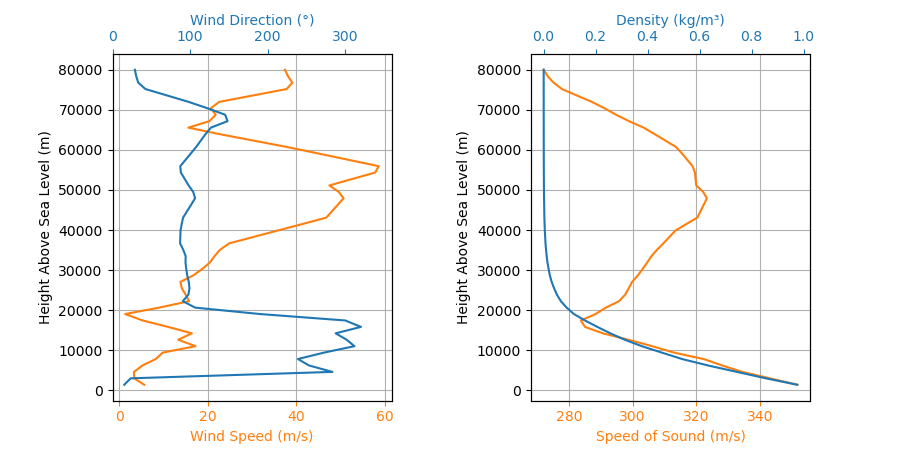

In [12]:
env.info()

In [13]:
LE2 = LiquidMotor(    
            thrust_source="../RocketPy-100a1/data/motors/LE2.eng",
            dry_mass=12.685,
            center_of_dry_mass=1.107,
            dry_inertia=(7.332,7.333,0.0318,-0.00153,0.0219,0.0284),
            nozzle_radius=0.0515/2,
           # burn_time,
            nozzle_position=0,
            reshape_thrust_curve=False,
            interpolation_method="linear",
            coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.02575 m

Motor Details
Total Burning Time: 11.557788944723619 s
Total Propellant Mass: 6.325 kg
Average Propellant Exhaust Velocity: nan m/s
Average Thrust: 1208.320 N
Maximum Thrust: 1952.3627250035097 N at 0.10050251256281408 s after ignition.
Total Impulse: 13965.504 Ns



/home/jovyan/RocketPy-100a1/rocketpy/Function.py:2178: RuntimeWarning: divide by zero encountered in double_scalars
  return Function(lambda x: (self.get_value_opt(x) / other(x)))
/home/jovyan/RocketPy-100a1/rocketpy/Function.py:2487: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  ans, _ = integrate.quad(self, a, b, epsabs=0.001, limit=10000)


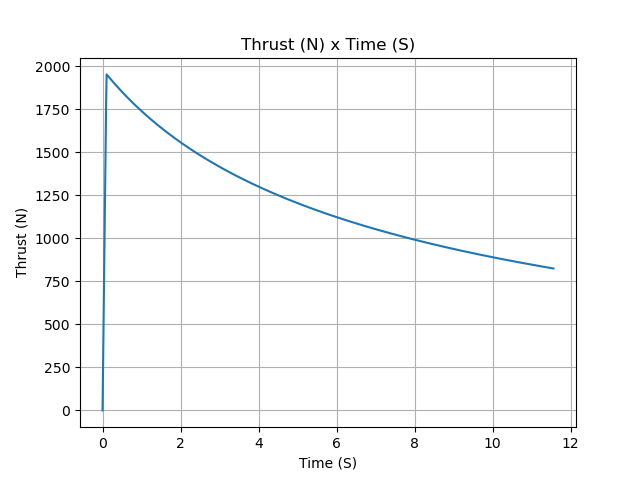

In [14]:
LE2.info()

In [15]:
ALULA = Rocket(
        #self,
        radius=0.0785,
        mass=23.347,     #  without motor -> total dry: 36.038kg
        inertia=(40.32089762,40.32707615,0.16968255,-0.00501791,-0.33114339,0.44168709),
        power_off_drag="../RocketPy-100a1/data/Alula_Cd_PowerOn.csv", ##UPDATE
        power_on_drag="../RocketPy-100a1/data/Alula_Cd_PowerOff.csv", ##UPDATE
        center_of_mass_without_motor=1.996, 
        coordinate_system_orientation="tail_to_nose",
)

railButtons = ALULA.set_rail_buttons(
    upper_button_position=0.18,
    lower_button_position=-1.4246,
    angular_position=60,
)

ALULA.add_motor(LE2, position=0) # origin = nozzle outlet

NoseCone = ALULA.add_nose(length=0.762, kind="vonKarman", position=3.99) 

FinSet = ALULA.add_trapezoidal_fins(
    n=3,
    root_chord =0.305,
    tip_chord=0.102,
    span=0.152,
    position=0.4,
    sweep_angle=33.7
)

In [16]:
ALULA.info()


Inertia Details

Rocket Mass: 23.347 kg (No Propellant)
Rocket Mass: 42.357 kg (With Propellant)
Rocket Inertia (with motor, but without propellant) 11: 54.149 kg*m2
Rocket Inertia (with motor, but without propellant) 22: 54.156 kg*m2
Rocket Inertia (with motor, but without propellant) 33: 0.201 kg*m2
Rocket Inertia (with motor, but without propellant) 12: -0.007 kg*m2
Rocket Inertia (with motor, but without propellant) 13: -0.309 kg*m2
Rocket Inertia (with motor, but without propellant) 23: 0.470 kg*m2


Geometrical Parameters

Rocket Maximum Radius: 0.0785 m
Rocket Frontal Area: 0.019359 m2

Rocket Distances
Rocket Center of Dry Mass - Nozzle Exit Distance: 1.683 m
Rocket Center of Dry Mass - Center of Propellant Mass: 1.683 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.251 m

Aerodynamic Components Parameters
Currently not implemented.


Aerodynamics Lift Coefficient Derivatives

Nosecone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.707/rad

In [17]:
#ALULA.parachutes.remove(drogue)
#ALULA.parachutes.remove(main)

In [18]:
main = ALULA.add_parachute(
    name="main", #120''d
    cd_s=7.07050353*2.2,
    trigger=457.2,  # ejection altitude: 1500ft
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

drogue = ALULA.add_parachute(
    name="drogue", #60''d
    cd_s=1.767638271*2.2,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

## Flight Results

In [19]:
test_flight = Flight(
  rocket=ALULA, environment=env, rail_length=18.288, inclination=85, heading=0
)


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1471.33 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -5.54 m/s
Lateral Surface Wind Speed: 1.52 m/s


Launch Rail

Launch Rail Length: 18.288  m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 1.035 s
Rail Departure Velocity: 32.802 m/s
Rail Departure Static Margin: 2.354 c
Rail Departure Angle of Attack: 9.781°
Rail Departure Thrust-Weight Ratio: 4.167
Rail Departure Reynolds Number: 2.730e+05


Burn out State

Burn out time: 11.558 s
Altitude at burn out: 1374.424 m (AGL)
Rocket velocity at burn out: 196.225 m/s
Freestream velocity at burn out: 197.705 m/s
Mach Number at burn out: 0.575
Kinetic energy at burn o

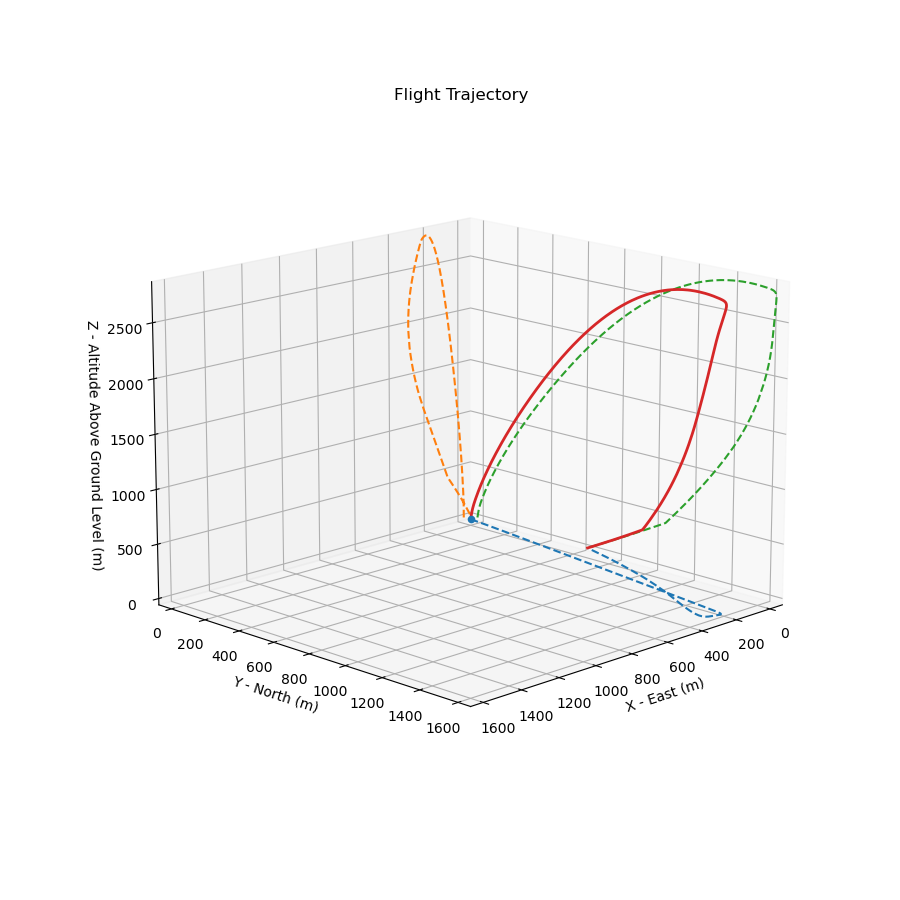



Trajectory Kinematic Plots



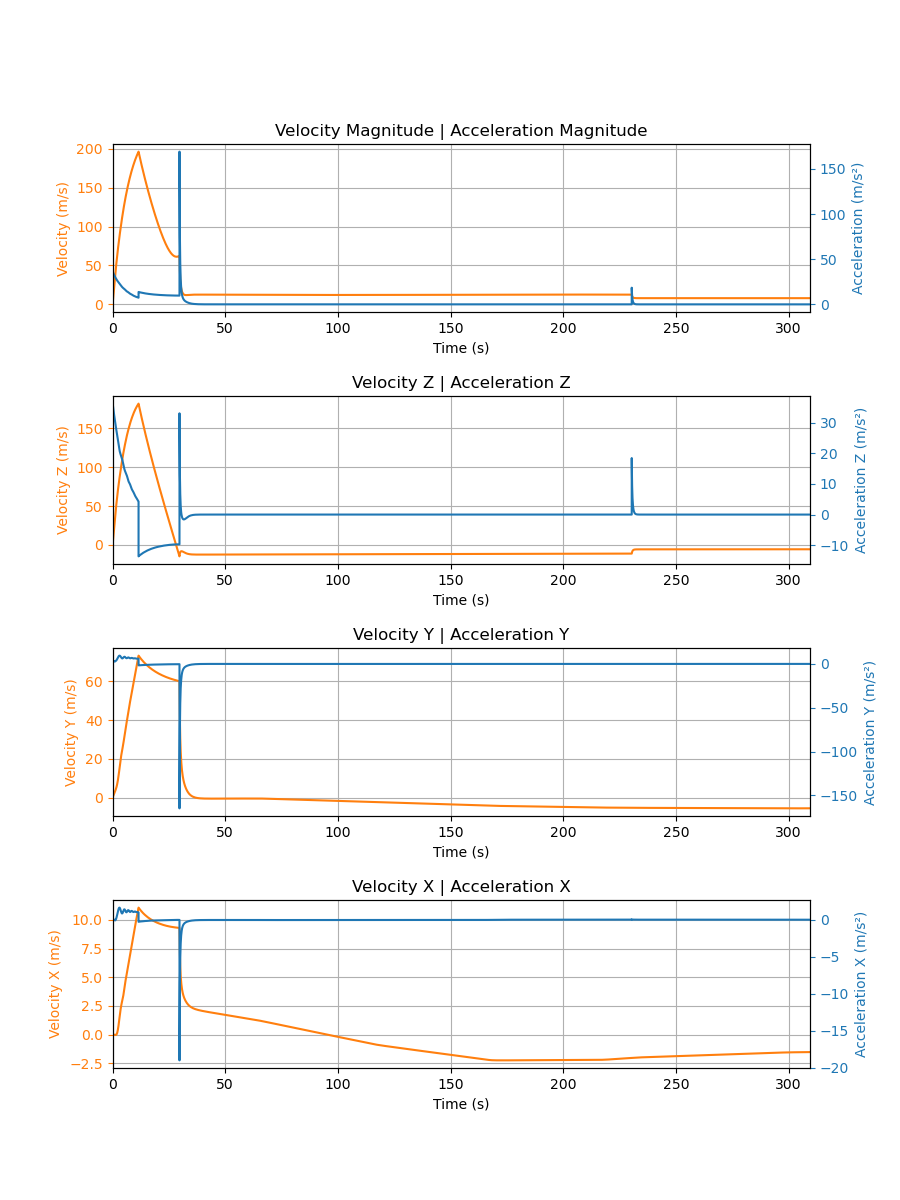



Angular Position Plots



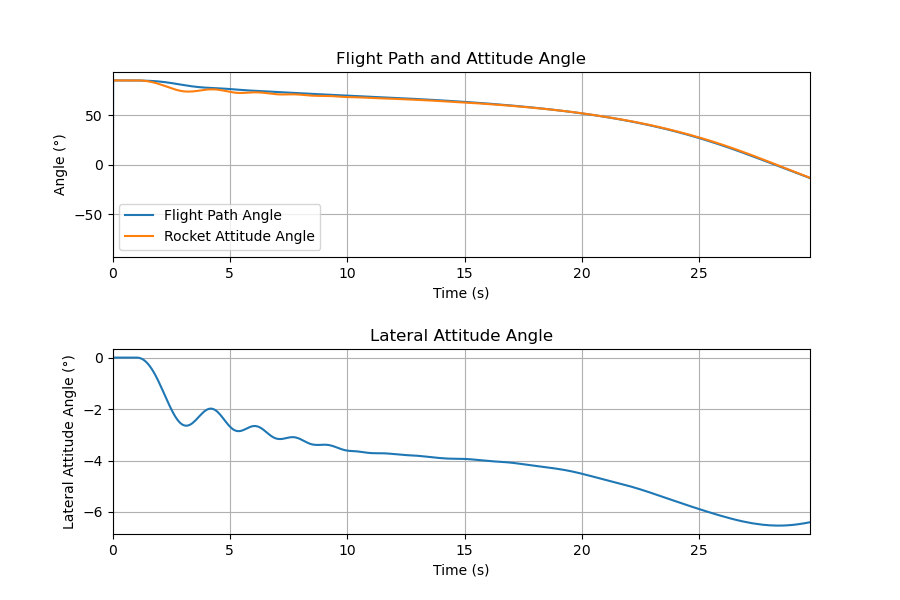



Path, Attitude and Lateral Attitude Angle plots



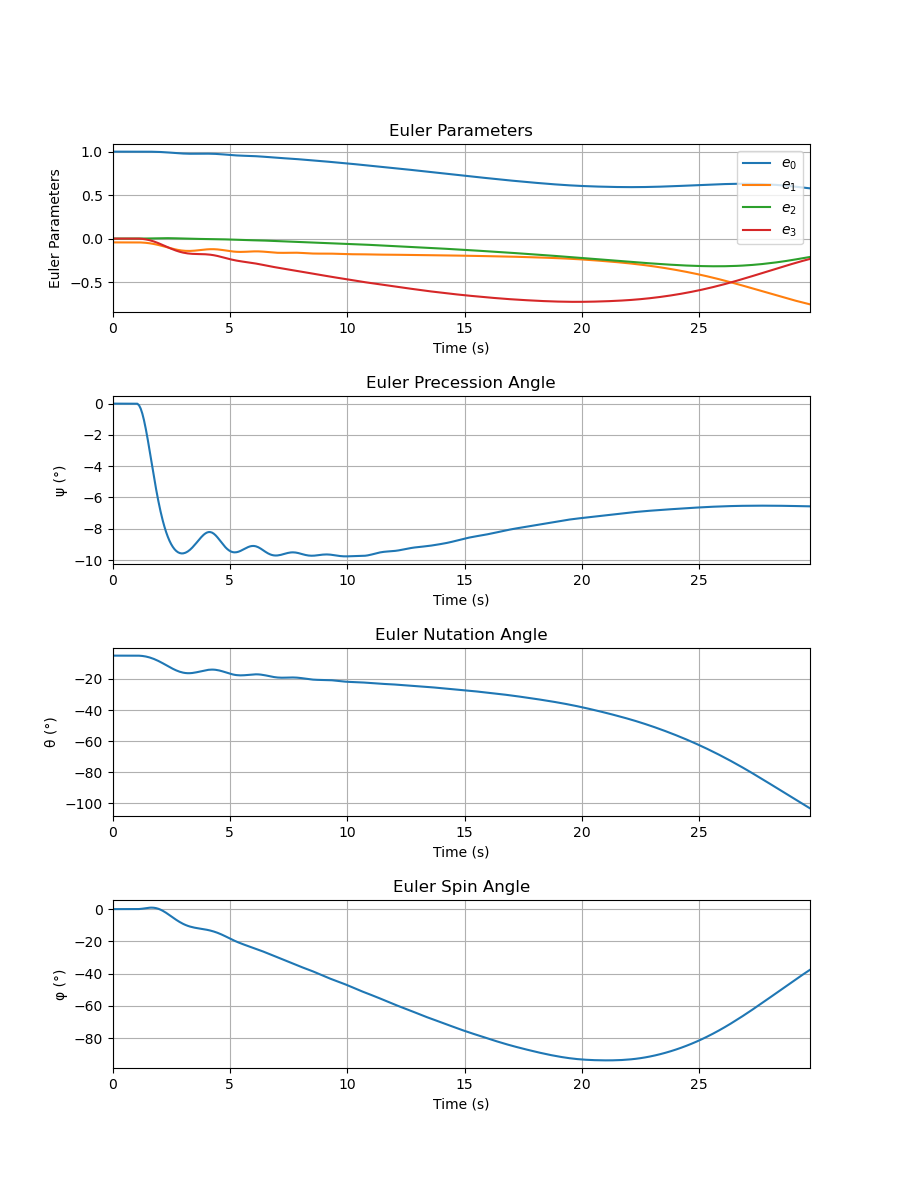



Trajectory Angular Velocity and Acceleration Plots



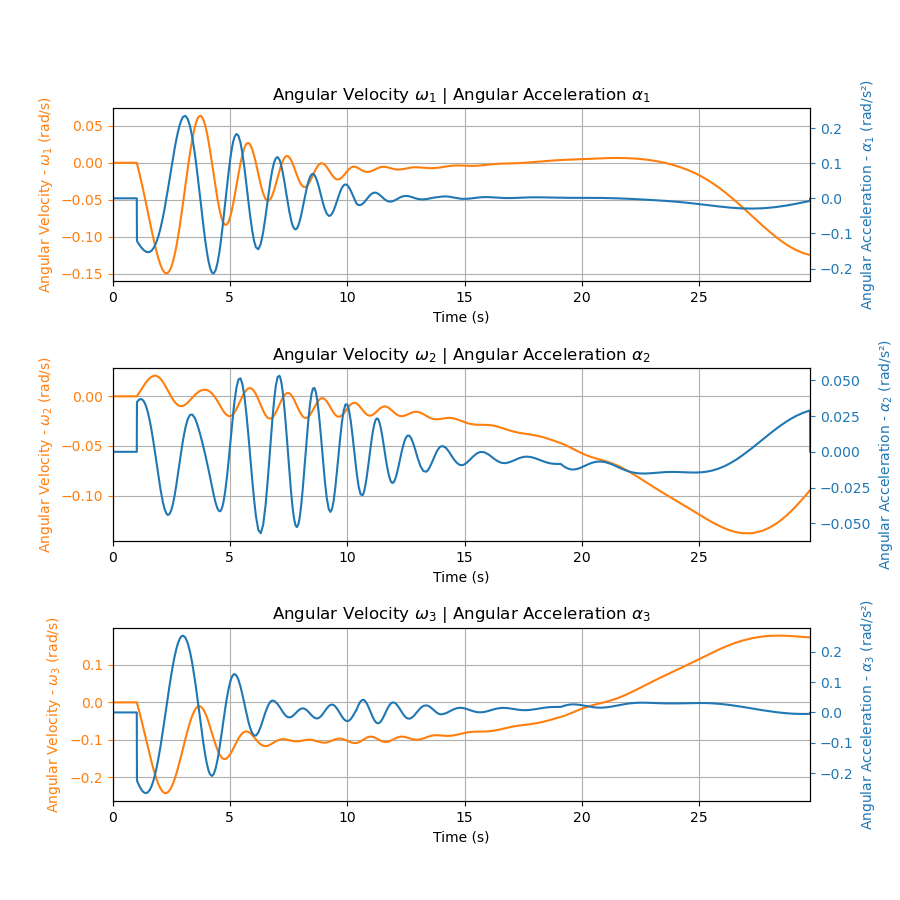



Aerodynamic Forces Plots



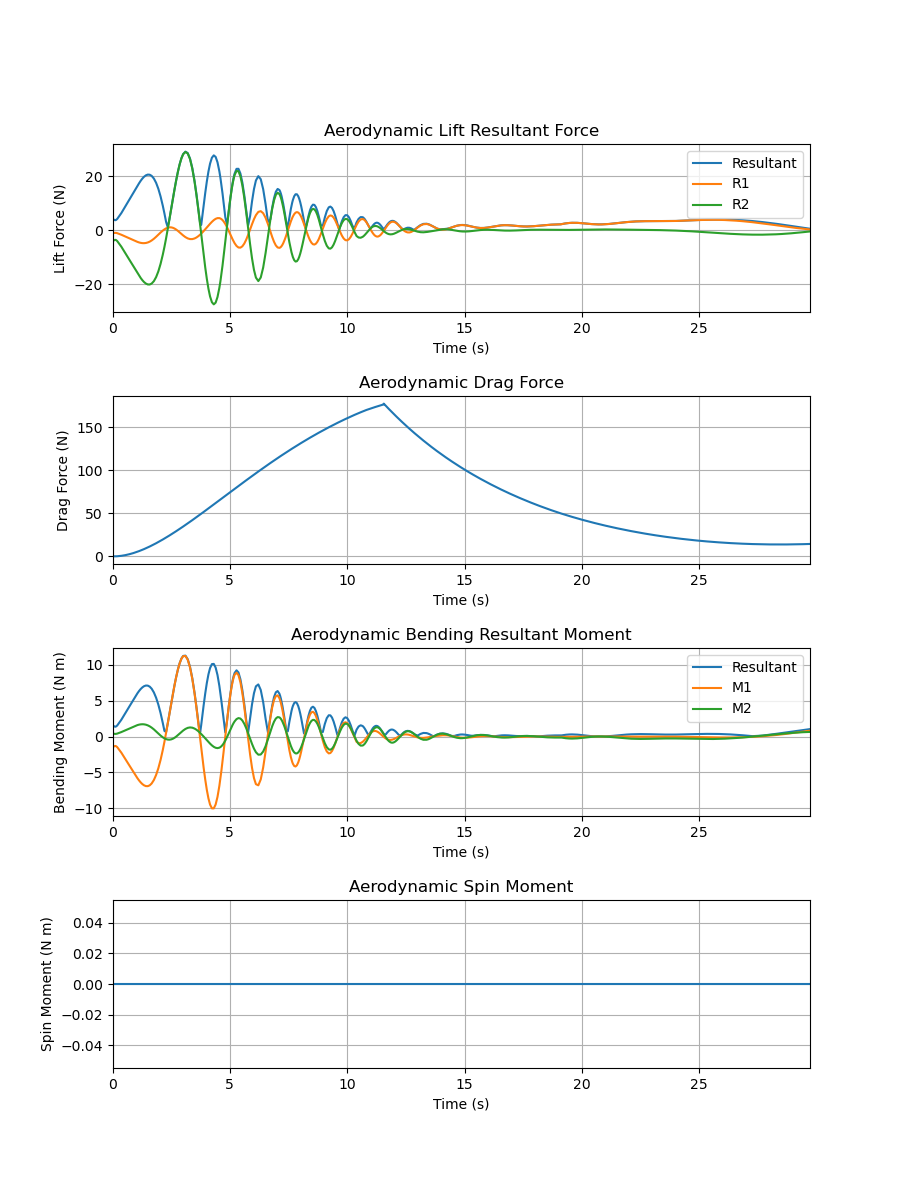



Rail Buttons Forces Plots



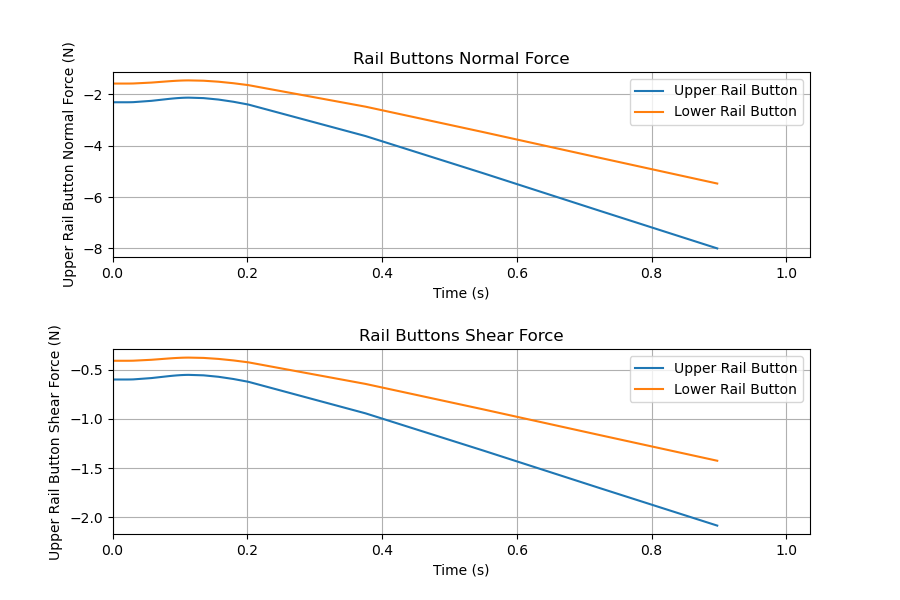



Trajectory Energy Plots



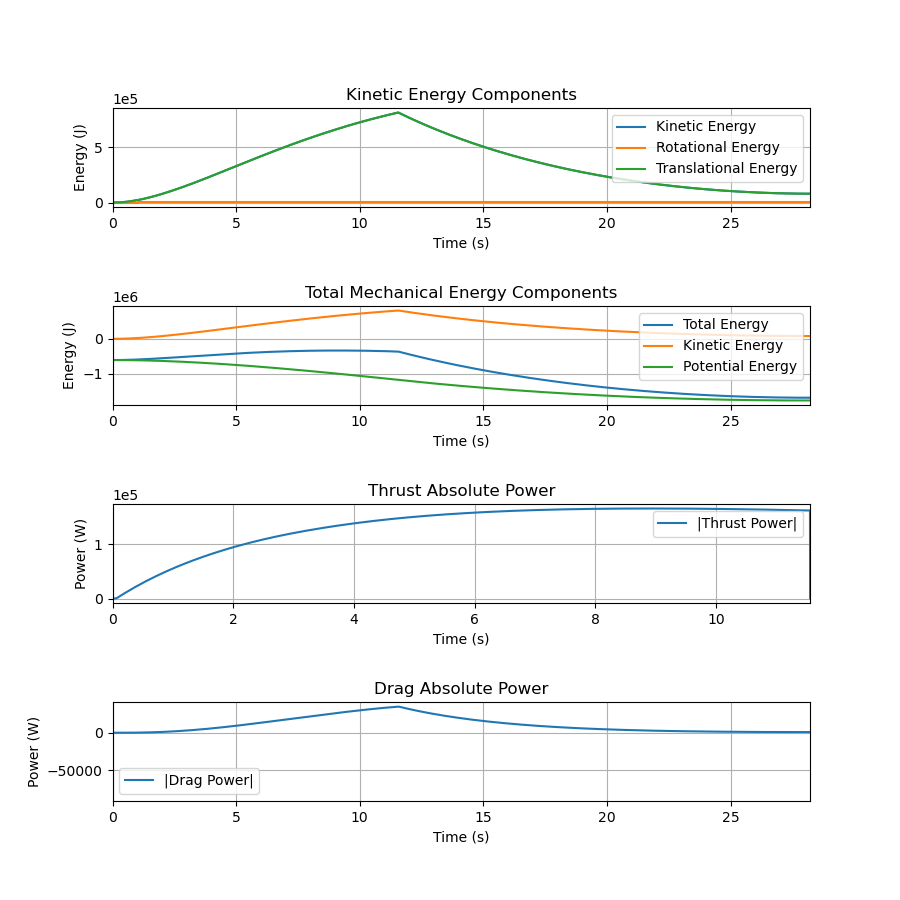



Trajectory Fluid Mechanics Plots



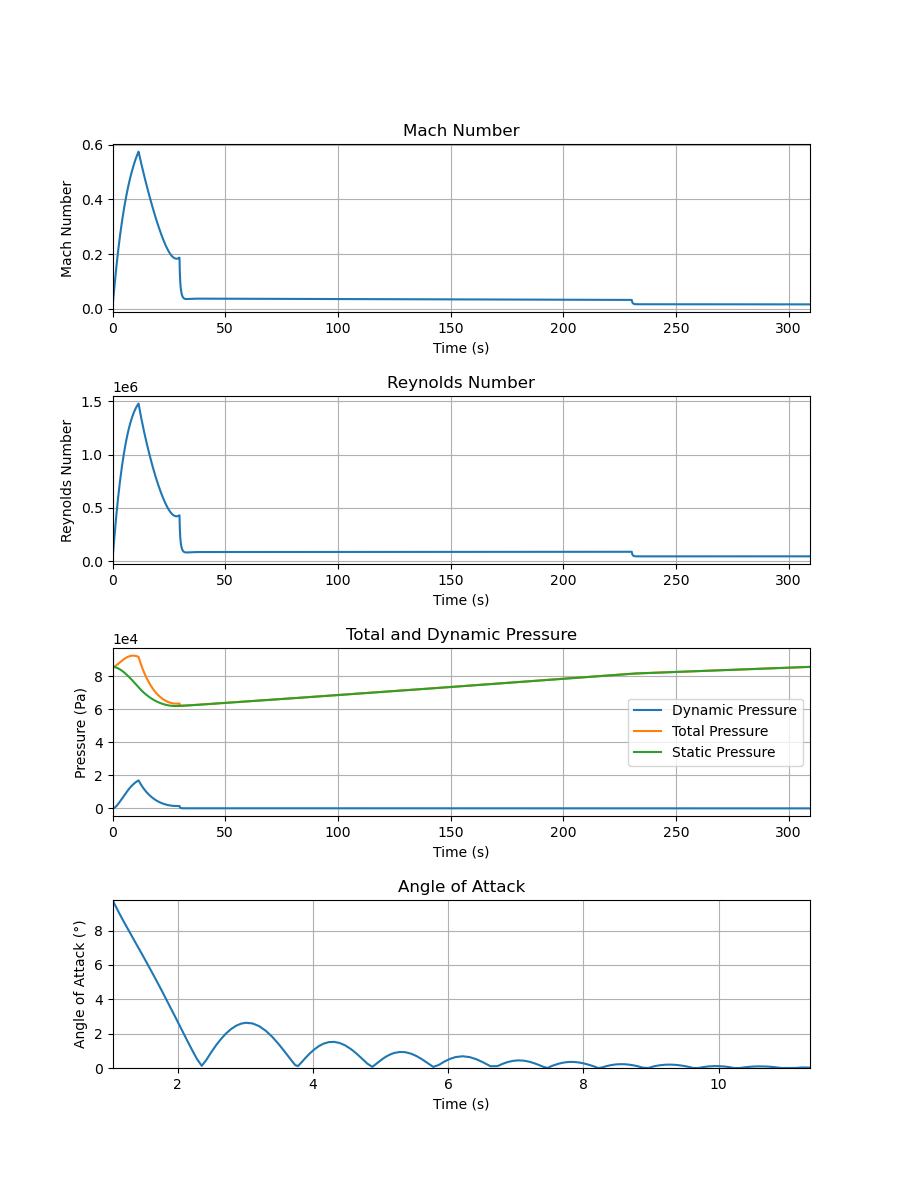



Trajectory Stability and Control Plots



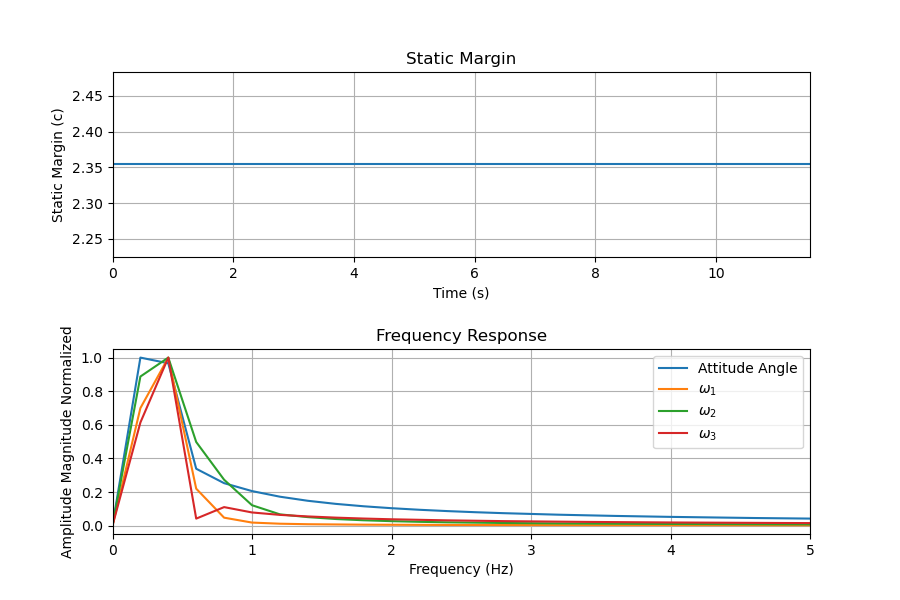



Rocket and Parachute Pressure Plots



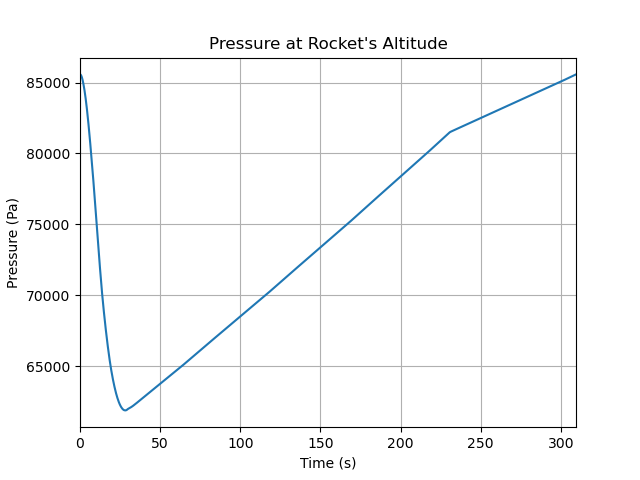


Parachute:  main


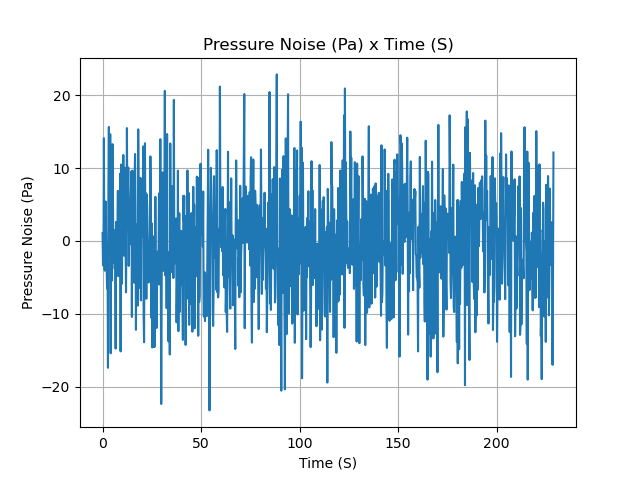

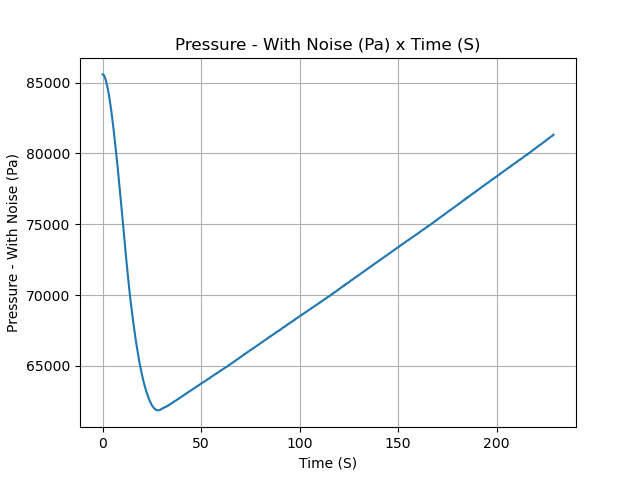

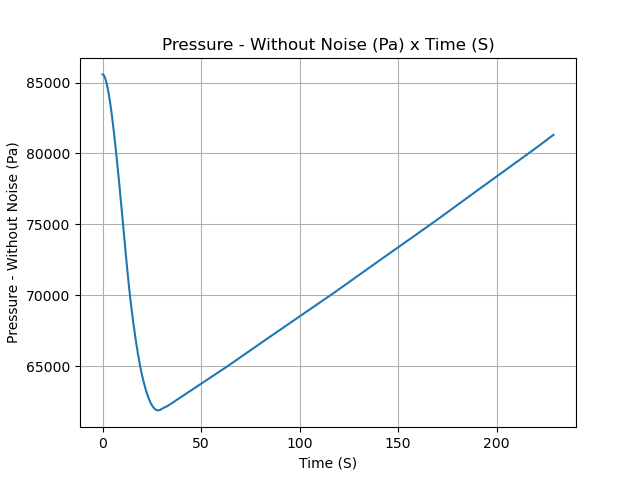


Parachute:  drogue


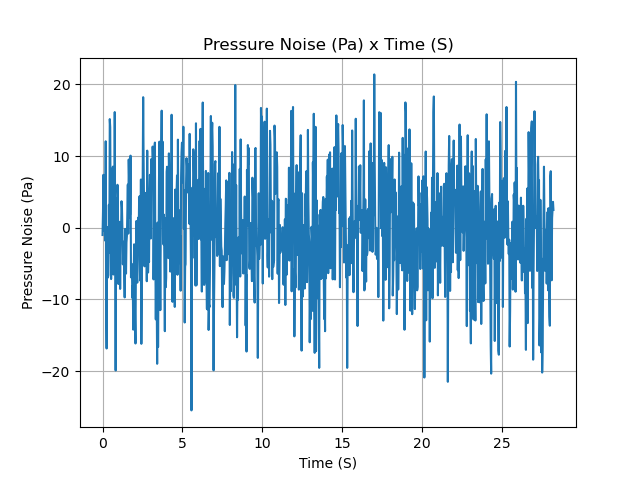

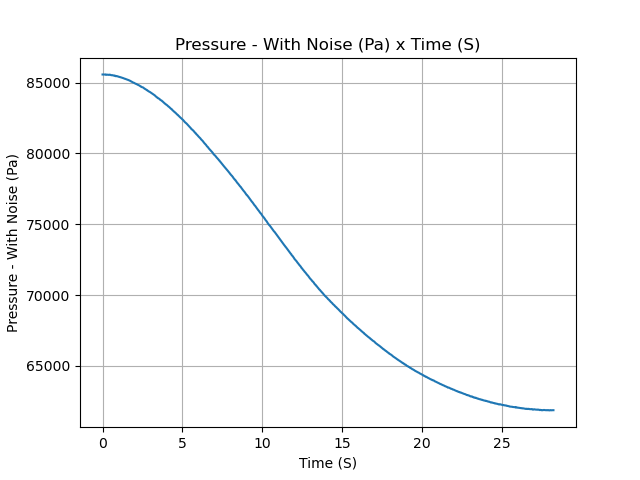

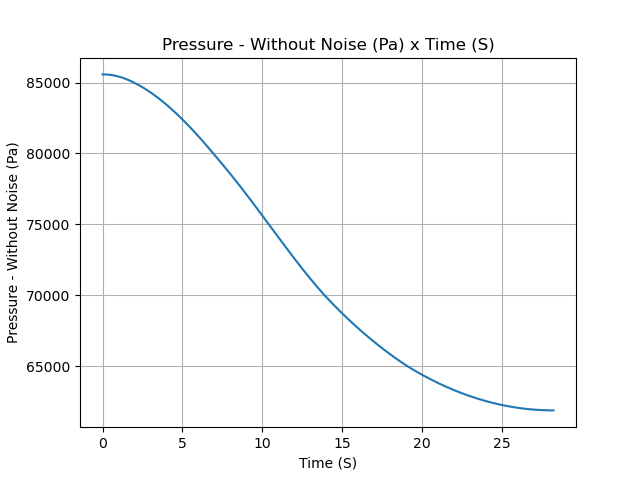

In [20]:
test_flight.all_info()

In [21]:
test_flight.export_kml(
    file_name="AlulaTestFlight.kml",
    extrude=True,
    altitude_mode="relativetoground",
) #Import kml file to Google Earth!

File  AlulaTestFlight.kml  saved with success!


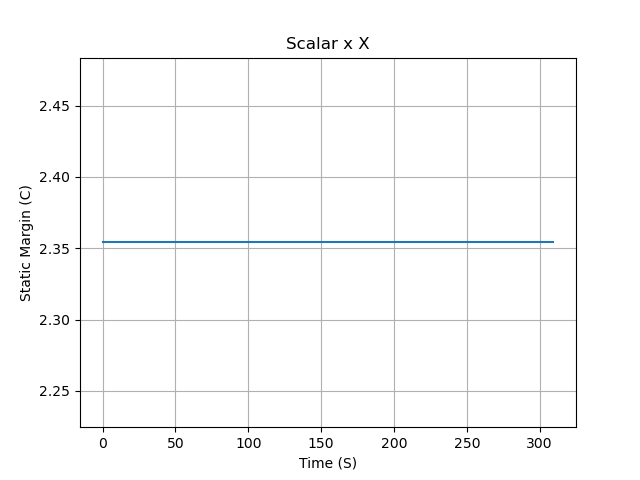

[2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982
 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982
 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982
 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982
 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982
 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982
 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982 2.3540982
 2.3540982]


In [22]:
# Plot & Print static margin for entire flight
test_flight.static_margin.plot(0, test_flight.t_final)
print(test_flight.static_margin(np.linspace(0, test_flight.t_final))) 